In [1]:
import sys


sys.path.append("/Users/aaron/phd/impact-of-contamination-on-taxonomy")

In [2]:
from workflow.external.gtdb_metadata import GtdbMetadataR207
from tqdm import tqdm
from matplotlib.ticker import ScalarFormatter, NullFormatter
import seaborn as sns

from workflow.external.gtdb_metadata import GtdbMetadataR207Full

import matplotlib.pyplot as plt
from workflow.gunc_helper.aggregate_max_css_level_merged import AggregateMaxCssLevelMerged

DEBUG = True (Aarons-MacBook-Pro.local)


In [3]:

DF_META = GtdbMetadataR207Full().output().read_cached()
DF_META.head()


[17/07/2023 13:45:17] - 215.3MiB = /srv/home/uqamussi/projects/gunc-chimeras/output/external/gtdb_r207_metadata_full.h5 -> /tmp/gunc-cache/srv/home/uqamussi/projects/gunc-chimeras/output/external/gtdb_r207_metadata_full.h5


,ambiguous_bases,checkm_completeness,checkm_contamination,checkm_marker_count,checkm_marker_lineage,checkm_marker_set_count,checkm_strain_heterogeneity,coding_bases,coding_density,contig_count,...,trna_aa_count,trna_count,trna_selenocysteine_count,domain,phylum,class,order,family,genus,species
gid,,,,,,,,,,,,,,,,,,,,,
GCA_000006155.2,1916,93.12,0.0,1171,g__Bacillus (UID902),324,0.0,4305660,80.178992,426,...,16,31,0,d__Bacteria,p__Firmicutes,c__Bacilli,o__Bacillales,f__Bacillaceae_G,g__Bacillus_A,s__Bacillus_A anthracis
GCA_000007325.1,1,99.95,0.0,149,k__Bacteria (UID2329),89,0.0,1973459,90.754610,1,...,20,47,0,d__Bacteria,p__Fusobacteriota,c__Fusobacteriia,o__Fusobacteriales,f__Fusobacteriaceae,g__Fusobacterium,s__Fusobacterium nucleatum
GCA_000007385.1,0,99.82,0.0,481,c__Gammaproteobacteria (UID4202),276,0.0,4190634,84.805944,1,...,20,53,0,d__Bacteria,p__Proteobacteria,c__Gammaproteobacteria,o__Xanthomonadales,f__Xanthomonadaceae,g__Xanthomonas,s__Xanthomonas oryzae
GCA_000008085.1,0,73.13,0.0,149,k__Archaea (UID2),107,0.0,462902,94.299480,1,...,17,38,0,d__Archaea,p__Nanoarchaeota,c__Nanoarchaeia,o__Nanoarchaeales,f__Nanoarchaeaceae,g__Nanoarchaeum,s__Nanoarchaeum equitans
GCA_000008885.1,0,100.00,0.0,134,k__Bacteria (UID2495),80,0.0,617456,87.831079,2,...,20,34,0,d__Bacteria,p__Proteobacteria,c__Gammaproteobacteria,o__Enterobacterales_A,f__Enterobacteriaceae_A,g__Wigglesworthia,s__Wigglesworthia glossinidia_A


In [4]:
DF_CSS = AggregateMaxCssLevelMerged().output().read_cached()
DF_CSS.head()

[17/07/2023 13:46:36] - 1.9MiB = /srv/home/uqamussi/projects/gunc-chimeras/output/gunc_helper/gunc_merged_max_css_level.h5 -> /tmp/gunc-cache/srv/home/uqamussi/projects/gunc-chimeras/output/gunc_helper/gunc_merged_max_css_level.h5


,n_genes_called,n_genes_mapped,n_contigs,taxonomic_level,proportion_genes_retained_in_major_clades,genes_retained_index,clade_separation_score,contamination_portion,n_effective_surplus_clades,mean_hit_identity,reference_representation_score,pass.GUNC,source
gid,,,,,,,,,,,,,
GCA_000143435.1,2189,2110,4,genus,0.89,0.86,0.55,0.03,0.06,0.95,0.82,False,gtdb
GCA_000153745.1,2202,2165,2,family,0.92,0.90,0.49,0.06,0.12,0.67,0.61,False,progenomes
GCA_000155005.1,6879,6313,84,genus,0.87,0.79,0.79,0.10,0.22,0.97,0.77,False,gtdb
GCA_000161815.1,4499,4335,8,genus,0.80,0.77,0.50,0.19,0.50,0.95,0.74,False,progenomes
GCA_000166735.2,3414,3247,793,genus,0.94,0.90,0.57,0.02,0.05,0.93,0.83,False,progenomes


In [5]:
def get_n_species_in_r207():
    return len(DF_META['species'].unique())
N_SP_IN_R207 = get_n_species_in_r207()
N_GID_IN_R207 = 317_542

In [6]:
def generate_gid_to_iso_source():
    out = dict()
    for gid, row in DF_META.iterrows():
        iso_source = row['ncbi_genome_category']
        if iso_source == 'derived from metagenome':
            out[gid] = 'MAG'
        elif iso_source == 'derived from single cell':
            out[gid] = 'SAG'
        else:
            out[gid] = 'Isolate'
    return out
D_GID_TO_ISO = generate_gid_to_iso_source()

In [7]:
FAIL_GIDS = set(DF_CSS.index)

In [8]:
from collections import defaultdict, Counter

def generate_sp_gids():
    out = defaultdict(set)
    for gid, row in DF_META.iterrows():
        out[row['species']].add(gid)
    return out

D_SP_TO_GIDS = generate_sp_gids()

In [9]:
import pandas as pd


def generate_n_sp_with_all_failed():
    out = list()
    for sp, gids in D_SP_TO_GIDS.items():
        n_fail = len(gids.intersection(FAIL_GIDS))
        if n_fail == len(gids):
            out.append({
                'species': sp,
                'n_gids': n_fail,
                'set': 'all_fail'
            })
        elif n_fail > 0:
            out.append({
                'species': sp,
                'n_gids': n_fail,
                'set': 'subset'
            })
        else:
            out.append({
                'species': sp,
                'n_gids': 0,
                'set': 'none'
            })


    return pd.DataFrame(out)

DF_SP_FAILED = generate_n_sp_with_all_failed()
DF_SP_FAILED.head()

,species,n_gids,set
0,s__Bacillus_A anthracis,1,subset
1,s__Fusobacterium nucleatum,0,none
2,s__Xanthomonas oryzae,5,subset
3,s__Nanoarchaeum equitans,0,none
4,s__Wigglesworthia glossinidia_A,0,none


In [10]:
Counter([x for x in DF_SP_FAILED[DF_SP_FAILED['set'] == 'subset']['n_gids'].values])

sum([x for x in DF_SP_FAILED[DF_SP_FAILED['set'] == 'all_fail']['n_gids'].values])

n_all_fail_sp = len(DF_SP_FAILED[DF_SP_FAILED['set'] == 'all_fail'])
print(f'There were {n_all_fail_sp:,} species with all genomes failing ({n_all_fail_sp / len(D_SP_TO_GIDS) * 100:.2f}%)')


There were 3,958 species with all genomes failing (6.02%)


In [11]:
def generate_df_with_counts():
    out = list()
    for sp, gids in D_SP_TO_GIDS.items():
        n_fail = len(gids.intersection(FAIL_GIDS))
        out.append({
            'species': sp,
            'n_gids': len(gids),
            'n_fail': n_fail,
            'pct_fail': n_fail / len(gids) * 100
        })
    return pd.DataFrame(out)

DF_SP_COUNTS = generate_df_with_counts()
DF_SP_COUNTS.head()

,species,n_gids,n_fail,pct_fail
0,s__Bacillus_A anthracis,417,1,0.239808
1,s__Fusobacterium nucleatum,13,0,0.000000
2,s__Xanthomonas oryzae,364,5,1.373626
3,s__Nanoarchaeum equitans,1,0,0.000000
4,s__Wigglesworthia glossinidia_A,1,0,0.000000


In [12]:
def generate_df_with_iso_counts():
    out = list()
    for sp, gids in D_SP_TO_GIDS.items():
        n_fail_total = len(gids.intersection(FAIL_GIDS))

        d_source_to_gids = defaultdict(set)
        for gid in gids:
            iso_source = D_GID_TO_ISO[gid]
            d_source_to_gids[iso_source].add(gid)

        for iso_source, iso_gids in d_source_to_gids.items():
            n_fail = len(iso_gids.intersection(FAIL_GIDS))
            out.append({
                'species': sp,
                'source': iso_source,
                'n_gids_in_sp': len(gids),
                'n_fail_in_sp': n_fail_total,
                'n_gids_in_iso': len(iso_gids),
                'n_fail_in_iso': n_fail,
                'pct_fail': n_fail / len(gids) * 100
            })
    df = pd.DataFrame(out)
    df = df.sort_values(by=['n_gids_in_sp', 'source'], ascending=[False, True])
    return df

DF_SP_COUNTS_ISO = generate_df_with_iso_counts()
DF_SP_COUNTS_ISO.head(100)

,species,source,n_gids_in_sp,n_fail_in_sp,n_gids_in_iso,n_fail_in_iso,pct_fail
44,s__Escherichia coli,Isolate,26859,3721,26675,3698,13.768197
45,s__Escherichia coli,MAG,26859,3721,181,23,0.085632
46,s__Escherichia coli,SAG,26859,3721,3,0,0.000000
214,s__Staphylococcus aureus,Isolate,13059,62,13056,62,0.474768
215,s__Staphylococcus aureus,MAG,13059,62,3,0,0.000000
...,...,...,...,...,...,...,...
1249,s__Bacteroides uniformis,Isolate,301,107,267,89,29.568106
1250,s__Bacteroides uniformis,MAG,301,107,34,18,5.980066
1923,s__Burkholderia cenocepacia,Isolate,292,29,292,29,9.931507
3995,s__Klebsiella michiganensis,Isolate,291,87,282,87,29.896907


In [13]:
# How many species comprise of >=50% of failed genomes?
print(len(DF_SP_COUNTS[DF_SP_COUNTS['pct_fail'] >= 50]))
print(f'{len(DF_SP_COUNTS[DF_SP_COUNTS["pct_fail"] >= 50]) / len(D_SP_TO_GIDS) * 100:.2f}% of species have >=50% of their genomes failing')

6351
9.67% of species have >=50% of their genomes failing


In [14]:
def get_sps_of_interest():
    df_subset = DF_SP_COUNTS[(DF_SP_COUNTS['n_gids'] > 1)]
    counter = 0
    out = list()
    for row in df_subset.sort_values(by=['n_gids'], ascending=False).itertuples():
        counter += 1
        out.append(row.species)
        if counter >= 20:
            break
    return out

SPS_TO_PLOT = get_sps_of_interest()

In [15]:
PCT_TARGET = 40
def get_sps_where_eq_pct(pct):
    out = list()
    target_n_gids = len(DF_CSS) * pct / 100
    total = 0
    for row in DF_SP_COUNTS.sort_values(by=['n_fail'], ascending=False).itertuples():
        out.append(row.species)
        total += row.n_fail
        if total >= target_n_gids:
            break
    return out
SP_WHERE_EQ_50 = get_sps_where_eq_pct(PCT_TARGET)

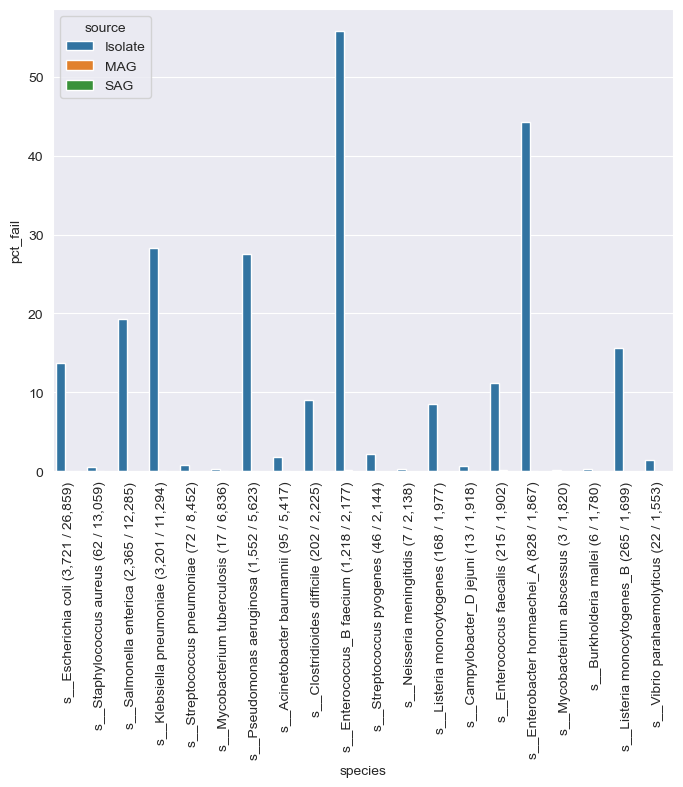

In [16]:
# Create a cumulative histogram showing % geomes that failed in a species on x
# and the % of species on the y axis.

def create_histogram():

    fig, ax = plt.subplots(figsize=(8, 6))
    df_subset = DF_SP_COUNTS_ISO[DF_SP_COUNTS_ISO['species'].isin(SPS_TO_PLOT)]
    sns.barplot(data=df_subset, x='species', y='pct_fail', hue='source', ax=ax, order=SPS_TO_PLOT)

    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

    labels = list()
    for item in ax.get_xticklabels():
        cur_sp = item.get_text()
        cur_df = DF_SP_COUNTS_ISO[DF_SP_COUNTS_ISO['species'] == cur_sp]
        n_in_sp = cur_df['n_gids_in_sp'].values[0]
        n_fail_in_sp = cur_df['n_fail_in_sp'].values[0]
        labels.append(f'{cur_sp} ({n_fail_in_sp:,} / {n_in_sp:,})')

    # labels = [item.get_text() for item in ax.get_xticklabels()]
    # labels = [SPS_TO_PLOT[SPS_TO_PLOT['species'] == x] for x in labels]
    ax.set_xticklabels(labels)

    return


create_histogram()


[10.416258432942362, 19.376872043221454, 25.997256669372675, 30.341796601629206, 33.75136466702125, 36.06919911541584, 36.86140581698066, 37.603224813145594, 38.23307113064413, 38.83492427847606, 39.40038630574141, 39.90986199367355, 40.38294656103911, 40.853231811438015, 41.32351706183692, 41.679030316602756, 42.01494835260197, 42.35086638860118, 42.66438988886712, 42.97231475519973]
['Isolate' 'MAG' 'SAG']


/var/folders/bp/jw5q113j0vj4pzdtdczxrltr0000gn/T/ipykernel_9594/3699157197.py:66: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=30, ha='right')


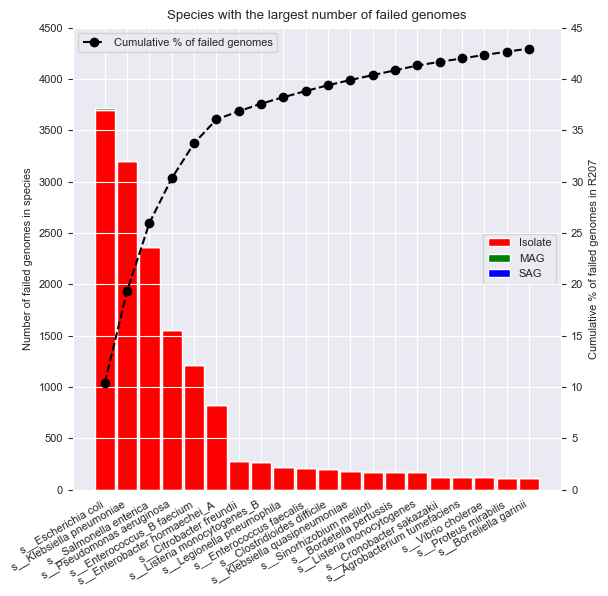

In [17]:
import numpy as np

def create_hist_v2():

    # Select how many species should be included in the plot
    n_species_to_plot = 20
    df_sp_counts_sorted = DF_SP_COUNTS.sort_values(by=['n_fail', 'species'], ascending=[False, True])
    sp_to_plot = df_sp_counts_sorted.iloc[0:n_species_to_plot]['species'].values

    # For each of the species selected, calculate the percentage of genomes that failed represented
    total_n_fail = DF_SP_COUNTS['n_fail'].sum()
    pct_of_all_fail_lst = list()
    pct_counter = 0
    for sp in sp_to_plot:
        cur_sp_n_fail = DF_SP_COUNTS[DF_SP_COUNTS['species'] == sp]['n_fail'].values[0]
        pct_counter += cur_sp_n_fail / total_n_fail * 100
        pct_of_all_fail_lst.append(pct_counter)
    print(pct_of_all_fail_lst)

    df_subset = DF_SP_COUNTS_ISO[DF_SP_COUNTS_ISO['species'].isin(set(sp_to_plot))]
    df_subset = df_subset.sort_values(by=['n_fail_in_sp', 'species', 'source'], ascending=[False, True, True])

    print(df_subset['source'].unique())

    x_iso = list()
    x_mag = list()
    x_sag = list()

    d_iso, d_mag, d_sag = dict(), dict(), dict()
    for row in df_subset.itertuples():
        if row.source == 'Isolate':
            d_iso[row.species] = row.n_fail_in_iso
        elif row.source == 'MAG':
            d_mag[row.species] = row.n_fail_in_iso
        elif row.source == 'SAG':
            d_sag[row.species] = row.n_fail_in_iso
        else:
            raise Exception('Unknown source')

    for speices in sp_to_plot:
        x_iso.append(d_iso.get(speices, 0))
        x_mag.append(d_mag.get(speices, 0))
        x_sag.append(d_sag.get(speices, 0))

    x_iso = np.array(x_iso)
    x_mag = np.array(x_mag)
    x_sag = np.array(x_sag)


    plt.rcParams['svg.fonttype'] = 'none'

    plt.rcParams.update({'font.size': 8})


    fig, ax = plt.subplots(figsize=(6, 6))

    ax2 = ax.twinx()
    ax_tot = ax2.plot(sp_to_plot, pct_of_all_fail_lst, color='k', linestyle='--', marker='o', label='Cumulative % of failed genomes')

    width = 0.9

    ax_iso = ax.bar(sp_to_plot, x_iso, width, color='r', label='Isolate')
    ax_mag = ax.bar(sp_to_plot, x_mag, width, color='g', bottom=x_iso, label='MAG')
    ax_sag = ax.bar(sp_to_plot, x_sag, width, color='b', bottom=x_iso+x_mag, label='SAG')

    ax.set_xticklabels(ax.get_xticklabels(), rotation=30, ha='right')

    ax.set_ylabel('Number of failed genomes in species')
    plt.title(f'Species with the largest number of failed genomes')
    # ax.set_ylim((0, 4000))
    plt.tight_layout()

    # lns = [ax_iso + ax_mag + ax_sag + ax_tot]
    # labs = [l.get_label() for l in lns]
    ax.legend(loc=5)
    ax2.legend(loc=2)
    ax2.set_ylabel('Cumulative % of failed genomes in R207')
    ax2.set_ylim((0, 50))

    ax.set_yticks([0, 500, 1000, 1500, 2000, 2500, 3000, 3500, 4000, 4500])
    ax2.set_yticks([0, 5, 10, 15, 20, 25, 30, 35, 40, 45])
    ax.set_ylim((0,4500))
    ax2.set_ylim(0, 45)

    plt.savefig('/tmp/gunc_stats_d.svg')

    return

create_hist_v2()

/var/folders/bp/jw5q113j0vj4pzdtdczxrltr0000gn/T/ipykernel_9594/3821175395.py:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels)


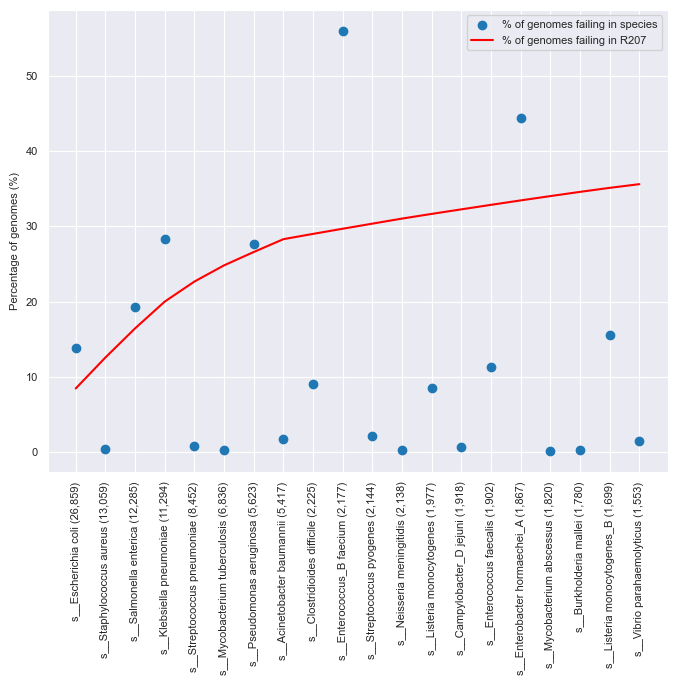

In [18]:
def create_scatterplot():

    # fig, ax = plt.subplots(figsize=(8, 6))
    #

    n_sp_to_plot = 20
    set_sp_to_plot = set(DF_SP_COUNTS.sort_values(by=['n_gids'], ascending=False).head(n_sp_to_plot)['species'].values)
    df_sp_counts_subset = DF_SP_COUNTS[DF_SP_COUNTS['species'].isin(set_sp_to_plot)]
    df_sp_counts_subset = df_sp_counts_subset.sort_values(['n_gids'], ascending=False)

    x_gids = list(df_sp_counts_subset['species'].values)
    y_pct_fail = list(df_sp_counts_subset['pct_fail'].values)

    fig, ax = plt.subplots(figsize=(8, 6))
    ax.scatter(x_gids, y_pct_fail, label='% of genomes failing in species')

    labels = list()
    for item in ax.get_xticklabels():
        cur_sp = item.get_text()
        cur_df = df_sp_counts_subset[df_sp_counts_subset['species'] == cur_sp]
        n_in_sp = cur_df['n_gids'].values[0]
        labels.append(f'{cur_sp} ({n_in_sp:,})')
    ax.set_xticklabels(labels)

    # Rotate the ticks on the x axis
    plt.xticks(rotation = 90)

    # Calculate the % of species in GTDB series

    y_pct_sp = list()
    total_sp = 0
    for sp in x_gids:
        n_gids = len(D_SP_TO_GIDS[sp])
        pct_gids_in_207 = n_gids / N_GID_IN_R207 * 100
        total_sp += pct_gids_in_207
        y_pct_sp.append(total_sp)
        # y_pct_sp.append(n_fail / n_gids * 100)
    # ax2 = ax.twinx()
    ax.plot(x_gids, y_pct_sp, color='red', label='% of genomes failing in R207')

    ax.set_ylabel('Percentage of genomes (%)')

    plt.legend()

    return

create_scatterplot()

